## TRANSFORM ANALYSIS

Q1. Plot the magnitude and phase response of the system transfer function $H(z)=\frac{1-0.8z^{-1}}{1-0.9z^{-1}-0.2z^{-2}}$.  Plot both the wrapped and unwrapped phase responses.

(You can use the built in function numpy.unwrap)

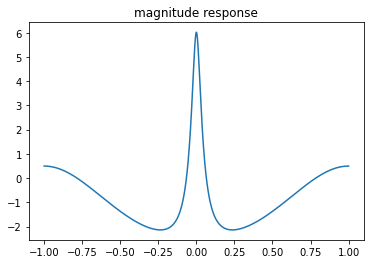

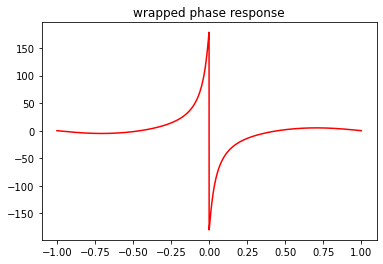

[-1.05479944e-15 -1.32123010e-02 -2.64245110e-02 ...  3.58181199e+02
  3.58167987e+02  3.58154775e+02]


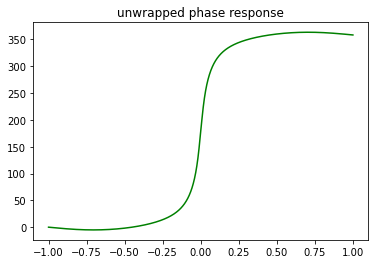

In [222]:
import numpy as np
import cmath
import matplotlib
import matplotlib.pyplot as plt
import scipy.signal as sig
#magnitude response
b =  [1,-0.8]
a =  [1,-0.9,-0.2]
c = np.arange(-1*np.pi, 1*np.pi, 2*np.pi/4096)
w1,h1=sig.freqz(b,a,c)
h1db=20*np.log10(abs(h1))
plt.title("magnitude response")
plt.plot(w1/(np.pi),h1db)
plt.show()

angles = np.angle(h1,deg=True)
plt.title("wrapped phase response")
plt.plot(w1/(np.pi), angles, 'r')
plt.show()

#unwrapping left
angles_unwrap = np.unwrap(angles)
print(angles_unwrap)
plt.title("unwrapped phase response")
plt.plot(w1/(np.pi), angles_unwrap, 'g')
plt.show()

Q2. Plot the response of the system defined by the transfer function 

${\displaystyle H(z)= \frac{\left(1-0.98 e^{j 0.8 \pi} z^{-1} \right) \left(1-0.98 e^{-j 0.8 \pi} z^{-1} \right)}{\left(1-0.8 e^{j 0.4 \pi} z^{-1} \right) \left(1-0.8 e^{-j 0.4 \pi} z^{-1}\right)}\prod_{k=1}^{4} \left(\frac{\left(c^*_k - z^{-1}\right)\left(c_k - z^{-1}\right)}{\left(1-c_k z^{-1}\right)\left(1-c^*_kz^{-1}\right)}\right)^2}$, 


where $c_k=0.95e^{j(0.15\pi+0.02\pi k)}$ for $k=1,2,3,4$.  

Input to the system is 
$x[n]=x_3[n]+x_1[n-61]+x_2[n-122]$, where 
$x_1[n]=w[n]\cos(0.2\pi n)$, 

$x_2[n]=w[n]\cos(0.4\pi n-\frac{\pi}{2})$, 

$x_3[n]=w[n]\cos(0.8\pi n+\frac{\pi}{5})$, and

$w[n]=\begin{cases} 0.54-0.46 \cos(\frac{2\pi n}{60}), & 0\leq n \leq 60 \\  0, & otherwise \\ \end{cases}$ 

Plot the following:
<ol>
    <li>Pole Zero locations of the system</li>
    <li>Magnitude and unwrapped Phase response of the system</li>
    <li>Group delay of the system</li>
    <li>Time domain plot of the input signal</li>
    <li>Magnitude of DTFT of the input signal</li>
    <li>Response of the system to the input $x[n]$</li>
</ol>


(For finding the product of the polynomials, use the function numpy.polynomial.polynomial.polymul)

In [223]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import numpy.polynomial.polynomial as pm
n = np.arange(-5,130)
def w(n):
    if (n >= 0 and n <= 60):
        return (0.54 - 0.46*np.cos(2*np.pi*n/60))
    else:
        return 0
w = np.array([w(i) for i in n]) 
w_61 = np.array([w[i - 61] for i in n]) 
w_122 = np.array([w[i - 122] for i in n])
x1 = w_61*np.cos(0.2*np.pi*(n-61))
x2 = w_122*np.cos(0.4*np.pi*(n-122) - np.pi/2)
x3 = w*np.cos(0.8*np.pi*n + np.pi/5)
x  =  x3 + x1 + x2

b = cmath.rect(0.98,0.8*np.pi)
b = pm.polymul([1,-b],[1,-b.conjugate()])
a = cmath.rect(0.8, 0.4*np.pi)
a = pm.polymul([1,-a],[1,-a.conjugate()])

In [224]:
product_CK_num = 1
product_CK_den = 1
def ck(k):
    return (cmath.rect(0.95,0.15*np.pi + 0.02*np.pi*k),cmath.rect(0.95,0.15*np.pi + 0.02*np.pi*k).conjugate())
for k in range(1,5):
    product_next_num = pm.polymul([ck(k)[1],-1],[ck(k)[0],-1])
    product_CK_num = pm.polymul(product_CK_num , product_next_num)
    product_next_den = pm.polymul([1,-ck(k)[0]],[1,-ck(k)[1]])
    product_CK_den = pm.polymul(product_CK_den , product_next_den)
    
product_CK_num = pm.polymul(product_CK_num,product_CK_num)
product_CK_den = pm.polymul(product_CK_den,product_CK_den)
b = pm.polymul(b,product_CK_num)
a = pm.polymul(a,product_CK_den)
print(len(a))

19


[-0.79283665+0.57602955j -0.79283665-0.57602955j  0.78966347+0.69635658j
  0.78951393+0.69587819j  0.83134493+0.64432553j  0.83212071+0.64600668j
  0.87001119+0.59068687j  0.87122251+0.5926485j   0.90634844+0.53621127j
  0.905751  +0.53545211j  0.78966351-0.6963559j   0.7895139 -0.69587888j
  0.83212132-0.64600443j  0.83134439-0.64432784j  0.87122364-0.59264594j
  0.87001001-0.59068939j  0.90634904-0.53621029j  0.90575036-0.53545304j] [0.2472136 +0.76084521j 0.2472136 -0.76084521j 0.71187987+0.62831943j
 0.71335874+0.62819533j 0.74826949+0.58258152j 0.7531175 +0.58201718j
 0.78300859+0.53433608j 0.78836963+0.53356292j 0.81868572+0.48340574j
 0.81667896+0.48373485j 0.7118827 -0.62832685j 0.71335627-0.62818722j
 0.74827663-0.58260734j 0.7531121 -0.58198917j 0.78301224-0.53436913j
 0.78836495-0.53353171j 0.8186847 -0.48339303j 0.81667891-0.48374861j]


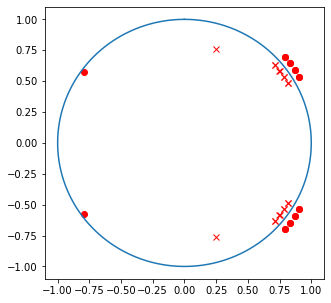

In [225]:
# 1) Pole Zero locations of the system
z,p,k =sig.tf2zpk(b,a)
print(z,p)
plt.figure(figsize=(5, 5))
plt.plot(z.real, z.imag, 'ro', p.real, p.imag, 'rx')
n1 = np.arange(0,np.pi*2,1/100)
plt.plot(np.sin(n1),np.cos(n1))
plt.show()


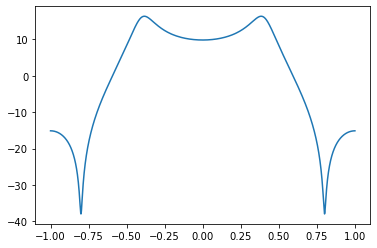

[-3.62946866e-15 -4.54623391e-02 -9.09244632e-02 ... -1.10570423e+03
 -1.10574969e+03 -1.10579515e+03]


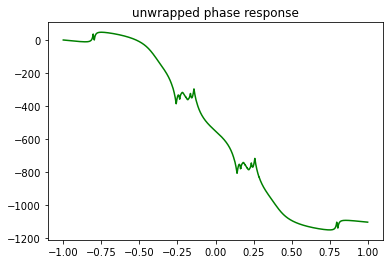

In [226]:
# 2) Magnitude and unwrapped Phase response of the system
c = np.arange(-1*np.pi, 1*np.pi, 2*np.pi/4096)
w1,h1=sig.freqz(b,a,c)
h1db=20*np.log10(abs(h1))
plt.plot(w1/(np.pi),h1db)
plt.show()

angles = np.angle(h1,deg=True)

angles_unwrap = np.unwrap(angles)
print(angles_unwrap)
plt.title("unwrapped phase response")
plt.plot(w1/(np.pi), angles_unwrap, 'g')
plt.show()


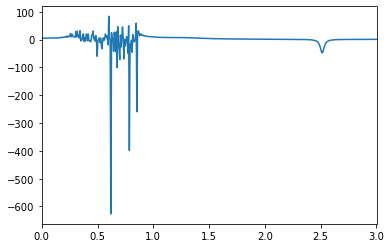

In [229]:
# 3) Group delay of the system

freq , groupdelay = sig.group_delay((b,a))
plt.xlim(0,3)
plt.plot(freq,groupdelay)

<StemContainer object of 3 artists>

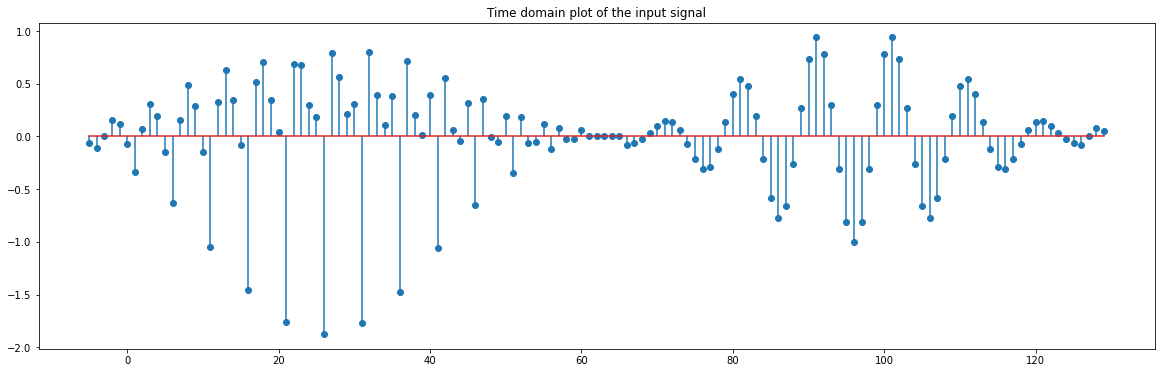

In [230]:
# 4) Time domain plot of the input signal
plt.figure(figsize = (20,6))
plt.title("Time domain plot of the input signal")
plt.stem(n,x)

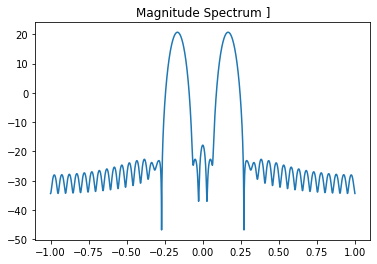

In [243]:
# 5) Magnitude of DTFT of the input signal
a1 = np.ones(1)
b1 = x
c1 = np.arange(-np.pi, np.pi, 2 * np.pi/ 4096)
wx, hx = sig.freqz(b1, a1, c1)
hxdb = 20 * np.log10(abs(hx))
plt.plot(wx / np.pi, hxdb)
plt.title("Magnitude Spectrum ]")
plt.show()


In [244]:
# 6) Response of the system to the input x[n]
hn = sig.dlti(b,a)

Q4. Plot the Magnitude and phase responses for the system $H(z)=\frac{1}{1-cz^{-1}}$ for $c=0.8, 1, 2, 0.8 e^{j\frac{\pi}{3}}, e^{j\frac{\pi}{3}}, 2 e^{j\frac{\pi}{3}}$

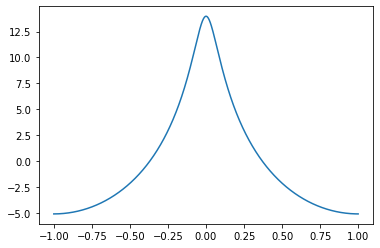

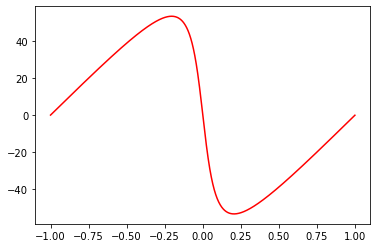

In [233]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig
#c = 0.8
b =  [1]
a =  [1,-0.8]
c = np.arange(-1*np.pi, 1*np.pi, 2*np.pi/2048)
w1,h1=sig.freqz(b,a,c)
h1db=20*np.log10(abs(h1))
plt.plot(w1/(np.pi),h1db)
plt.show()

angles = np.angle(h1,deg=True)
plt.plot(w1/(np.pi), angles, 'r')
plt.show()


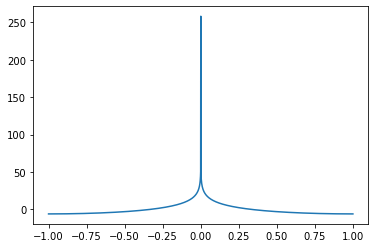

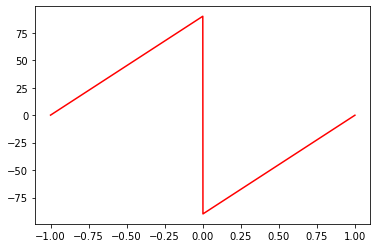

In [234]:

#c = 1
b =  [1]
a =  [1,-1]
c = np.arange(-1*np.pi, 1*np.pi, 2*np.pi/2048)
w1,h1=sig.freqz(b,a,c)
h1db=20*np.log10(abs(h1))
plt.plot(w1/(np.pi),h1db)
plt.show()

angles = np.angle(h1,deg=True)
plt.plot(w1/(np.pi), angles, 'r')
plt.show()


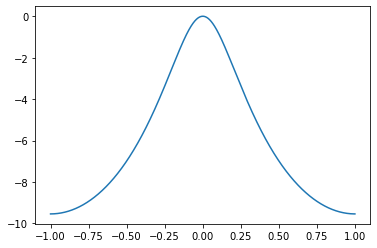

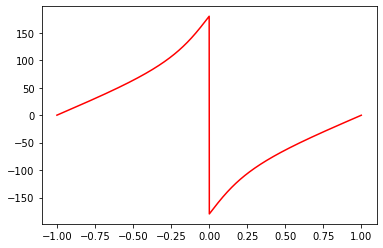

In [235]:

#c = 2
b =  [1]
a =  [1,-2]
c = np.arange(-1*np.pi, 1*np.pi, 2*np.pi/2048)
w1,h1=sig.freqz(b,a,c)
h1db=20*np.log10(abs(h1))
plt.plot(w1/(np.pi),h1db)
plt.show()

angles = np.angle(h1,deg=True)
plt.plot(w1/(np.pi), angles, 'r')
plt.show()


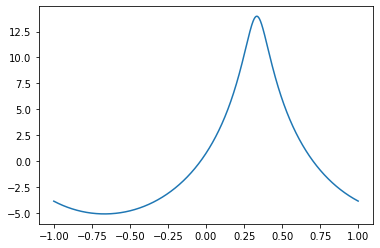

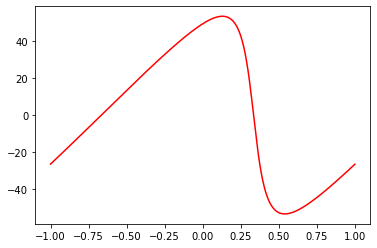

In [236]:
#c = 0.8𝑒𝑗𝜋3,
z = cmath.rect(0.8,np.pi/3)
b =  [1]
a =  [1,-z]
c = np.arange(-1*np.pi, 1*np.pi, 2*np.pi/2048)
w1,h1=sig.freqz(b,a,c)
h1db=20*np.log10(abs(h1))
plt.plot(w1/(np.pi),h1db)
plt.show()

angles = np.angle(h1,deg=True)
plt.plot(w1/(np.pi), angles, 'r')
plt.show()

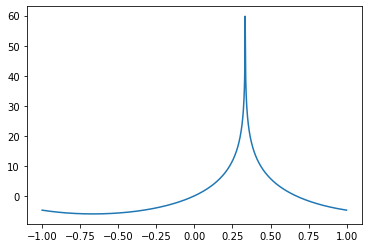

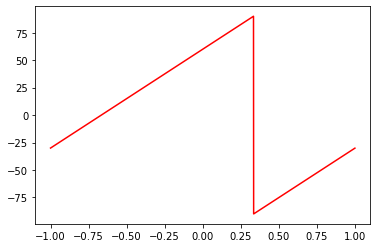

In [237]:
#c = 𝑒𝑗𝜋3
z = cmath.rect(1.0,np.pi/3)
b =  [1]
a =  [1,-z]
c = np.arange(-1*np.pi, 1*np.pi, 2*np.pi/2048)
w1,h1=sig.freqz(b,a,c)
h1db=20*np.log10(abs(h1))
plt.plot(w1/(np.pi),h1db)
plt.show()

angles = np.angle(h1,deg=True)
plt.plot(w1/(np.pi), angles, 'r')
plt.show()

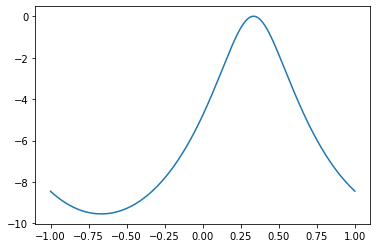

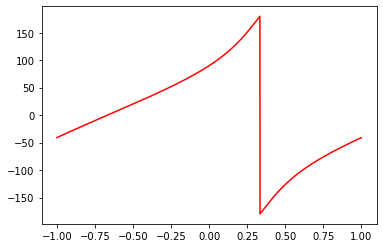

In [238]:
#2𝑒𝑗𝜋3
z = cmath.rect(2.0,np.pi/3)
b =  [1]
a =  [1,-z]
c = np.arange(-1*np.pi, 1*np.pi, 2*np.pi/2048)
w1,h1=sig.freqz(b,a,c)
h1db=20*np.log10(abs(h1))
plt.plot(w1/(np.pi),h1db)
plt.show()

angles = np.angle(h1,deg=True)
plt.plot(w1/(np.pi), angles, 'r')
plt.show()

Q5. Impulse response of a system is given by $h[n]=\frac{sin\left( \frac{\pi}{2}(n-20)\right)}{\pi (n-20)}$.  Plot the response of this system to the input $x[n]=w[n]\sin(\frac{\pi}{6}n)$, where $w[n]=\begin{cases} 0.54-0.46 \cos(\frac{2\pi n}{40}), & 0\leq n \leq 40 \\  0, & otherwise \\ \end{cases}$. 

Compare the theoretical group delay and the group delay observed from the plot.  

<StemContainer object of 3 artists>

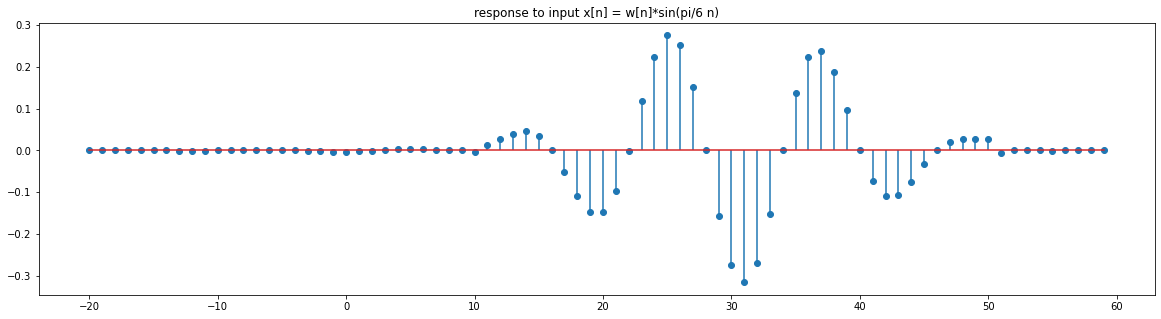

In [239]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig
from scipy.misc import derivative
def W(n):
    if (n >= 0 and n <= 40):
        return (0.54 - 0.46*np.cos(2*np.pi*n/40))
    else:
        return 0
W = np.array([W(i) for i in n]) 
x = W*np.sin(n * (np.pi/6))
h = np.sinc(np.pi*(n-20)/2)/2.0

y = sig.convolve(x,h)
n2 = np.arange(-20,249)
plt.figure(figsize=(20,5))
plt.title("response to input x[n] = w[n]*sin(pi/6 n)")
plt.stem(n2[:80],y[:80])



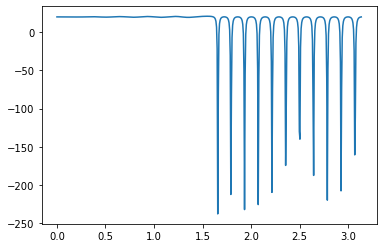

In [240]:
n = np.arange(0,45)
def h(n):
    return (np.sinc((n-20)/2.0)/2.0)
h = np.array([h(i) for i in n]) 

freq , groupdelay = sig.group_delay((h,1))
plt.plot(freq,groupdelay)
